In [1]:
%matplotlib inline
import ipywidgets as widgets
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['savefig.dpi'] = 144

## Context  

Analytics has permeated all industries as a result of an exponential increase in data collection. More service providers have access to more information to better understand what customers want. The same applies to the credit card industry. Within the credit card payment processing field, significant amounts of data is available
to understand a multitude of consumer behaviour, including their spending patterns.  

This data can also be used to understand transactions and activities from existing customers to identify trends that are emerging in different regions. This information can also be used to better understand our customers and identify channels to better engage with prospective customers.  

Additional to this, data acquired from credit processing is becoming an increasingly important tool as a fight against fraud. Combined with Machine Learning, this data can be analyzed quickly to uncover suspicious purchase activit

## Business Problem  

In order to make better decisions, Ms. Juliet Sithole the CEO of KECredits would like to start taking data analysis more seriously in guiding her decisions. She comes to you with a list of questions with the objective of developing a better understanding of customer spending habits and repayment behaviour 


__1.__ We would like to understand spending patterns for each customer. Please help us understand what each customer spent during each month in 2004, 2005 and 2006<br> 
__2.__ What is the average monthly spend by each customer for each month?<br>
__3.__ What are the top 3 months in terms of average spend by month?<br>
__4.__ Which 10 customers spend the most money in festive season months (November and December) and winter months (May, June and July). We need two dataframes<br>
__5.__ Which month do we record more customer spend in, does this differ by year?<br>
__6.__ Which month do we record more customers spending money in terms of number of transactions?<br>
__7.__ What are most customers spending money on, does this change by month?<br>
__8.__ What products are users under the age of 21 spending more money on?<br>
__9.__ What products are users between the ages of 25 and 40, spending more money on, does this differ depending on the city they are from?<br>

## Data

Get the data and clean for analysis

In [2]:
customer_file = "customer_information.csv"
spending_file = "spend.csv"

customer_df = pd.read_csv(customer_file)
spending_df = pd.read_csv(spending_file)

In [3]:
customer_df.head()

,Unnamed: 0,No,Customer,Age,City,Product,Limit,Company,Segment
0,0,1,A1,76,Nairobi,Gold,500000.0,C1,Self Employed
1,1,2,A2,71,Mombasa,Silver,100000.0,C2,Salaried_MNC
2,2,3,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt
3,3,4,A4,47,Nakuru,Platimum,10001.0,C4,Govt
4,4,5,A5,56,Nairobi,Platimum,10002.0,C5,Normal Salary


In [4]:
customer_df = customer_df.drop(['Unnamed: 0', 'No',], axis=1)
customer_df.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,Nairobi,Gold,500000.0,C1,Self Employed
1,A2,71,Mombasa,Silver,100000.0,C2,Salaried_MNC
2,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,Nakuru,Platimum,10001.0,C4,Govt
4,A5,56,Nairobi,Platimum,10002.0,C5,Normal Salary


In [5]:
spending_df.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [6]:
spending_df = spending_df.drop('Sl No:', axis=1)

In [7]:
spending_df = spending_df.sort_values(by='Month', ascending=True)

In [8]:
spending_df.head()

,Customer,Month,Type,Amount
1398,A40,1-Apr-06,FOOD,236231.22
1180,A54,1-Apr-06,RENTAL,410461.33
199,A14,1-Apr-06,BUS TICKET,341157.43
90,A89,1-Apr-06,JEWELLERY,24972.02
308,A21,1-Apr-06,CAMERA,265164.32


In [9]:
df = pd.merge(customer_df, spending_df, on='Customer')
df.head(20)

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,1-Feb-05,CAR,23370.20
1,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
2,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,12-Jan-04,TRAIN TICKET,440563.22
3,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
4,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
5,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,19-Apr-06,AIR TICKET,346925.68
6,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,2-Apr-06,TRAIN TICKET,176372.82
7,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,22-Nov-05,PETRO,183839.61
8,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,23-Feb-05,SANDALS,168285.60
9,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,23-Feb-05,CLOTHES,476702.09


In [10]:
df.shape

(1500, 10)

In [11]:
df['day'] = df['Month'].astype(np.datetime64).dt.weekday_name
df['month'] = df['Month'].astype(np.datetime64).dt.month_name()
df['year'] = df['Month'].astype(np.datetime64).dt.year


In [12]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['month'] = pd.Categorical(df['month'], categories=months, ordered=True)

In [13]:
df.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,day,month,year
0,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,1-Feb-05,CAR,23370.20,Tuesday,February,2005
1,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,Monday,January,2004
2,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,12-Jan-04,TRAIN TICKET,440563.22,Monday,January,2004
3,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,Thursday,January,2004
4,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,Monday,January,2005


__1.__ We would like to understand spending patterns for each customer. Please help us understand what each customer spent during each month in 2004, 2005 and 2006 

In [17]:
df_2004_2006 = df.loc[df.year.between(2004, 2006)]
df_2004_2006.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,day,month,year
0,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,1-Feb-05,CAR,23370.20,Tuesday,February,2005
1,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,Monday,January,2004
2,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,12-Jan-04,TRAIN TICKET,440563.22,Monday,January,2004
3,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,Thursday,January,2004
4,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,Monday,January,2005


In [18]:
df_2004_2006.sort_values(by='Month', ascending=True, inplace=True)
df_2004_2006 = df_2004_2006.groupby(['Customer', 'month'])['Amount'].sum().reset_index()
df_2004_2006.sort_values(by=['Customer', 'month'], ascending=True, inplace=True)
df_2004_2006.head()

,Customer,month,Amount
0,A1,January,2609338.11
1,A1,February,876178.45
2,A1,April,523298.50
3,A1,May,361141.31
4,A1,August,344372.10


In [19]:
@widgets.interact(customers=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'])

def plot(customers='A1'):
    
    df_2004_2006.loc[df_2004_2006.Customer == customers].plot(kind='bar', x='month', )
#     fig, ax = plt.subplots(1, 1, figsize=(20, 5))
#     ax.plot(df_2004_2006.loc[df_2004_2006['Customer'] == customers], x=['year', 'month'], y='Amount')

interactive(children=(Dropdown(description='customers', options=('A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8…

__2.__ What is the average monthly spend by each customer for each month? 

In [20]:
avg_spennd_monthly = df.groupby(['Customer', 'month'])['Amount'].mean().reset_index()
avg_spennd_monthly.head()

,Customer,month,Amount
0,A1,January,372762.587143
1,A1,February,175235.690000
2,A1,April,261649.250000
3,A1,May,361141.310000
4,A1,August,344372.100000


In [21]:
@widgets.interact(customers=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'])

def avg_spend(customers='A1'):
    
    avg_spennd_monthly.loc[avg_spennd_monthly.Customer == customers].plot(kind='bar', x='month', )

interactive(children=(Dropdown(description='customers', options=('A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8…

__3.__ What are the top 3 months in terms of average spend by month? 

In [22]:
avg_per_mnth = df.groupby('month')['Amount'].mean().reset_index()
avg_per_mnth.sort_values(by='Amount', ascending=False, inplace=True)
avg_per_mnth.head()

,month,Amount
6,July,268042.287143
0,January,256221.133553
10,November,249099.824405
2,March,246255.783723
5,June,241329.181250


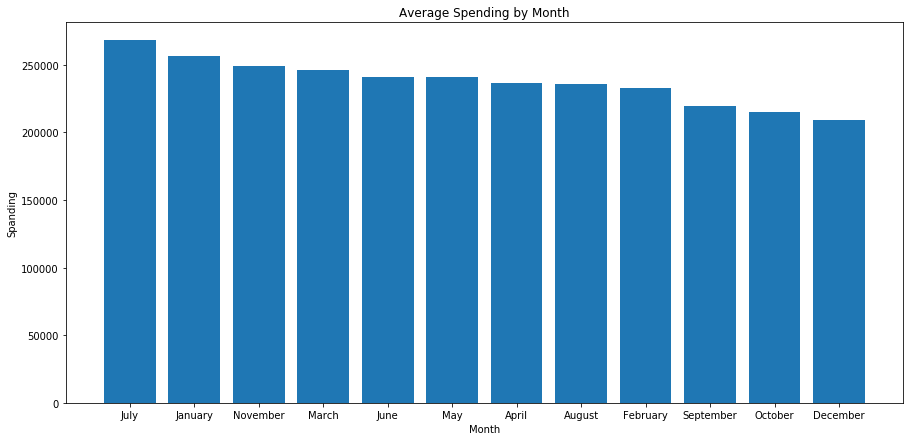

In [28]:
plt.figure(figsize=(15, 7))
ax = plt.subplot()
plt.bar(avg_per_mnth.month, avg_per_mnth.Amount)
plt.title('Average Spending by Month')
plt.xlabel('Month')
plt.ylabel('Spanding')
plt.savefig('Q3_average_spending_by_month.png')
plt.show()

__4.__ Which 10 customers spend the most money in festive season months (November and December) and winter months (May, June and July). We need two dataframes 

In [29]:
festive_mnths = df.loc[df.month.isin(['November', 'December'])]
festive_mnths.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,day,month,year
7,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,22-Nov-05,PETRO,183839.61,Tuesday,November,2005
19,A2,71,Mombasa,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73,Tuesday,November,2004
24,A2,71,Mombasa,Silver,100000.0,C2,Salaried_MNC,3-Nov-06,MOVIE TICKET,75728.35,Friday,November,2006
34,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,3-Dec-06,JEWELLERY,491710.50,Sunday,December,2006
47,A4,47,Nakuru,Platimum,10001.0,C4,Govt,3-Nov-05,CLOTHES,23040.07,Thursday,November,2005


In [30]:
top_spending_festive = festive_mnths.groupby('Customer')['Amount'].sum().reset_index()
top_spending_festive.sort_values(by='Amount', ascending=False, inplace=True)
top_spending_festive.head(10)

,Customer,Amount
14,A22,1377630.85
19,A27,1158049.59
54,A62,1139662.93
34,A41,1138169.32
28,A36,1122009.63
10,A19,892197.56
13,A21,854385.42
12,A20,823395.26
53,A61,775188.92
27,A35,766607.33


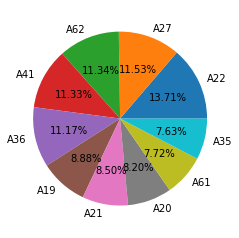

In [43]:
plt.pie(top_spending_festive.Amount[:10], autopct='%0.2f%%',labels=top_spending_festive.Customer[:10],)
# plt.legend(top_spending_festive.Customer)

plt.axis
plt.show()

In [44]:
winter_mnths = df.loc[df.month.isin(['May', 'June', 'July'])]
winter_mnths.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,day,month,year
17,A1,76,Nairobi,Gold,500000.0,C1,Self Employed,5-May-04,BUS TICKET,361141.31,Wednesday,May,2004
28,A2,71,Mombasa,Silver,100000.0,C2,Salaried_MNC,6-May-06,TRAIN TICKET,369689.78,Saturday,May,2006
31,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,24-May-05,PETRO,183707.24,Tuesday,May,2005
39,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,7-May-05,RENTAL,285184.71,Saturday,May,2005
46,A4,47,Nakuru,Platimum,10001.0,C4,Govt,25-May-05,PETRO,31107.95,Wednesday,May,2005


In [45]:
top_winter_spenders = winter_mnths.groupby('Customer')['Amount'].sum().reset_index()
top_winter_spenders.sort_values(by='Amount', ascending=False, inplace=True)
top_winter_spenders.head(10)

,Customer,Amount
56,A60,2868123.22
31,A38,2797132.68
39,A45,2483197.66
4,A13,2387277.32
42,A48,2300607.55
5,A14,2118808.25
57,A61,2026678.84
3,A12,1982730.34
23,A30,1910820.33
32,A39,1903512.61


__5.__ Which month do we record more customer spend in, does this differ by year? 

In [46]:
top_months = df.groupby(['year', 'month'])['Amount'].sum().reset_index()
top_months.sort_values(by='Amount',ascending=False, inplace=True)
top_months

,year,month,Amount
0,2004,January,77275605.08
20,2006,March,53635040.37
8,2005,February,38606783.01
10,2005,May,34397512.16
21,2006,April,21852082.95
22,2006,May,13225113.46
16,2005,November,12018019.56
11,2005,June,11032900.74
19,2006,February,10662046.95
7,2005,January,8196758.44


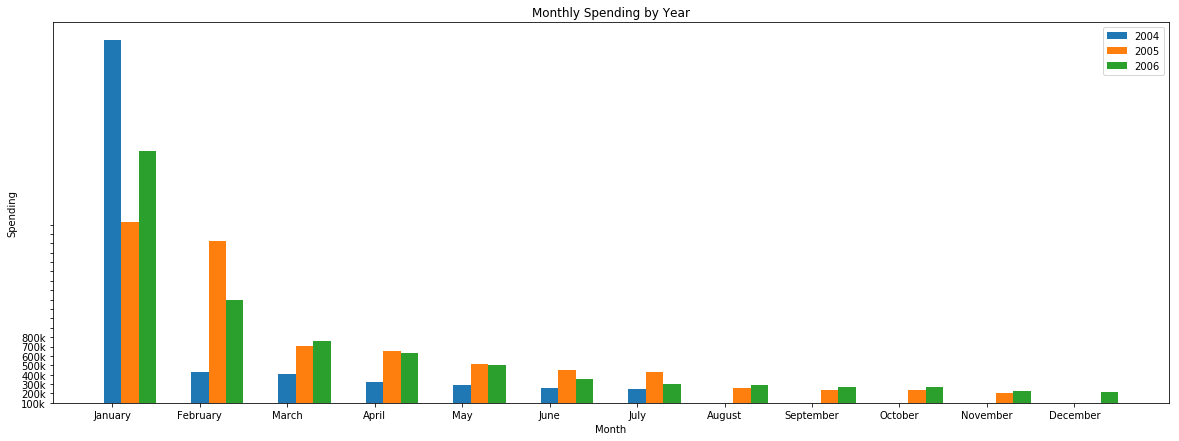

In [114]:
labels=top_months.month.unique().sort_values()
x = list(range(len(labels)))
y = [i*1000000 for i in range(0, 100, 2)]
y_labels = ['100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k']
width = 0.2


plt.figure(figsize=(20, 7))
ax = plt.subplot()
plt.bar(list(range(len(top_months.loc[top_months.year == 2004]['Amount']))),  top_months.loc[top_months.year == 2004]['Amount'].values, width=width)
plt.bar([i + width for i in list(range(len(top_months.loc[top_months.year == 2005]['Amount'])))], top_months.loc[top_months.year == 2005]['Amount'].values, width=width)
plt.bar([i + width*2 for i in list(range(len(top_months.loc[top_months.year == 2006]['Amount'])))], top_months.loc[top_months.year == 2006]['Amount'].values, width=width)

ax.set_xticks(x)
ax.set_xticklabels(labels)

ax.set_yticks(y)
ax.set_yticklabels(y_labels)

ax.legend(['2004', '2005', '2006'])

plt.title('Monthly Spending by Year')
plt.xlabel('Month')
plt.ylabel('Spending')



plt.show()

In [113]:
y

[0,
 2000000,
 4000000,
 6000000,
 8000000,
 10000000,
 12000000,
 14000000,
 16000000,
 18000000]

In [89]:
plt.bar?

__6.__ Which month do we record more customers spending money in terms of number of transactions?

In [25]:
mnth_per_transact = df.groupby('month')['Amount'].count().reset_index()
mnth_per_transact.sort_values(by='Amount', ascending=False, inplace=True)
mnth_per_transact

,month,Amount
0,January,349
1,February,238
2,March,231
4,May,210
3,April,150
10,November,84
5,June,56
6,July,42
7,August,42
8,September,42


__7.__ What are most customers spending money on, does this change by month? 

In [26]:
spending_type = df.groupby(['month', 'Type', ])['Amount'].sum().reset_index()
spending_type.sort_values(by='Amount', ascending=False, inplace=True)
spending_type.head(10)

,month,Type,Amount
4,January,CAMERA,17823032.82
7,January,FOOD,11858415.70
13,January,SHOPPING,9327906.15
10,January,PETRO,9321912.40
70,May,PETRO,8452007.03
36,March,CLOTHES,7706663.68
25,February,PETRO,7665808.46
67,May,FOOD,7592141.47
29,February,TRAIN TICKET,7214447.96
37,March,FOOD,7178372.37


__8.__ What products are users under the age of 21 spending more money on? 

In [27]:
users_u21 = df.loc[df.Age < 21]
users_u21.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,day,month,year
236,A14,16,Nairobi,Gold,500000.0,C14,Salaried_Pvt,1-Apr-06,BUS TICKET,341157.43,Saturday,April,2006
237,A14,16,Nairobi,Gold,500000.0,C14,Salaried_Pvt,1-Feb-05,SHOPPING,463680.60,Tuesday,February,2005
238,A14,16,Nairobi,Gold,500000.0,C14,Salaried_Pvt,1-Feb-05,AIR TICKET,394078.34,Tuesday,February,2005
239,A14,16,Nairobi,Gold,500000.0,C14,Salaried_Pvt,11-Jul-06,CAMERA,268233.08,Tuesday,July,2006
240,A14,16,Nairobi,Gold,500000.0,C14,Salaried_Pvt,15-Jan-04,CAMERA,366089.04,Thursday,January,2004


In [28]:
users_u21.groupby('Product')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

,Product,Amount
1,Platimum,10339766.98
0,Gold,8728471.73
2,Silver,214636.58


__9.__ What products are users between the ages of 25 and 40, spending more money on, does this differ depending on the city they are from?

In [29]:
users_o21 = df.loc[df.Age.between(25, 40)]
users_o21.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,day,month,year
29,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,15-Jan-04,MOVIE TICKET,418202.62,Thursday,January,2004
30,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,16-Feb-05,TRAIN TICKET,194358.94,Wednesday,February,2005
31,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,24-May-05,PETRO,183707.24,Tuesday,May,2005
32,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,25-Mar-06,FOOD,418516.31,Saturday,March,2006
33,A3,34,Kisumu,Platimum,10000.0,C3,Salaried_Pvt,27-Apr-05,TRAIN TICKET,94389.66,Wednesday,April,2005


In [30]:
o21 = users_o21.groupby(['City', 'Product', ])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

In [31]:
for i in o21.City.unique():
    print(o21.loc[o21.City == i])

      City   Product       Amount
8  Mombasa  Platimum  25792454.93
7  Mombasa      Gold  15597502.98
9  Mombasa    Silver   5841663.51
       City   Product       Amount
10  Nairobi      Gold  13354734.98
11  Nairobi  Platimum   5683569.97
12  Nairobi    Silver   4961749.40
     City   Product       Amount
3  Kisumu    Silver  11163624.78
1  Kisumu      Gold   4829942.06
2  Kisumu  Platimum   3479189.93
      City   Product      Amount
15  Nakuru    Silver  9059045.42
13  Nakuru      Gold  4261646.45
14  Nakuru  Platimum   310869.68
     City   Product     Amount
16  Thika  Platimum  7888606.8
      City Product      Amount
6  Malindi    Gold  6876389.81
     City Product      Amount
4  Kitale    Gold  6391189.56
5  Kitale  Silver  4032743.60
      City Product      Amount
0  Eldoret    Gold  6189339.25


### Aditionally

In [32]:
spending_by_day = df.groupby('day')['Amount'].agg([np.sum, np.mean, ])
spending_by_day

,sum,mean
day,,
Friday,37947689.48,248024.114248
Monday,68319298.26,249340.504599
Saturday,58703377.78,238631.616992
Sunday,51838730.82,252871.857659
Thursday,56277490.30,241534.293133
Tuesday,44370231.88,246501.288222
Wednesday,47187255.67,225776.342919


In [33]:
# spending_by_day.sort_values(by='Amount', ascending=False, inplace=True)

In [34]:
seg_df = df.groupby('Segment')['Amount'].sum().reset_index()
seg_df.sort_values(by='Amount', ascending=False, inplace=True)
seg_df

,Segment,Amount
1,Normal Salary,1.076079e+08
3,Salaried_Pvt,6.866101e+07
4,Self Employed,6.662369e+07
0,Govt,6.350277e+07
2,Salaried_MNC,5.824866e+07


In [35]:
seg_by_type = df.groupby(['Segment', 'Type'])['Amount'].sum().reset_index()
seg_by_type.sort_values(by='Amount', ascending=False, inplace=True)
seg_by_type.head()

,Segment,Type,Amount
25,Normal Salary,PETRO,18247117.44
15,Normal Salary,AIR TICKET,12838860.71
49,Salaried_Pvt,CAMERA,11425922.89
22,Normal Salary,FOOD,10051685.70
19,Normal Salary,CAMERA,9776031.25
